In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats 

sns.set_theme()

In [2]:
import sys
import os


module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"\\models")


In [3]:
from univariate import Univariate,readCSV
from loaddata import ReadData
from aggregarefunctions import aggregateClass
from knn import Models

In [4]:
dataRead=ReadData('../data/Processed_data.csv')
data=dataRead.readCsv()

Reading Data...

Successfully read the dataset ...


In [5]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Year,Hour,Avg Bearer TP DL (Mbps),Avg Bearer TP UL (Mbps),Activity Duration DL (s),Activity Duration UL (s),Total Session (Mbs),five Class,Decile Class,Decile Class Category
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,2019,12,0.022461,0.042969,37.624,38.787,493.406131,Low Usage,1,Outlier
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2019,13,0.015625,0.025391,0.168,3.560,1176.919550,Outlier,8,Moderately High Usage
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,2019,17,0.005859,0.008789,0.000,0.000,685.103951,Moderate Usage,2,Extremely Low
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2019,0,0.042969,0.042969,3.330,37.882,1562.493020,Outlier,9,Extreme High Usage
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,2019,20,0.005859,0.008789,0.000,0.000,1104.727653,Extreme Usage,7,High Usage


In [6]:
aggFunc=aggregateClass(data)


In [7]:
userData=data.groupby(['MSISDN/Number'])['Bearer Id'].nunique().sort_values(ascending=False)
userData=pd.DataFrame(userData)
userData.columns=['No of xDR sessions']

sessionData=userData['No of xDR sessions']

userData.head(10)

,No of xDR sessions
MSISDN/Number,
3.362632e+10,520
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.376054e+10,15
3.367588e+10,15
3.366716e+10,13
3.360452e+10,12
3.360313e+10,12


In [8]:
sessionDF=pd.DataFrame(sessionData)

In [9]:
sessionDF['MSISDN/Number']=sessionDF.index

In [10]:
sessionDF.reset_index(drop=True,inplace=True)

In [11]:
sessionDF

,No of xDR sessions,MSISDN/Number
0,520,3.362632e+10
1,17,3.362578e+10
2,17,3.361489e+10
3,16,3.365973e+10
4,15,3.376054e+10
...,...,...
106851,1,3.366066e+10
106852,1,3.366066e+10
106853,1,3.366066e+10
106854,1,3.366066e+10


In [12]:
aggFunc.aggregateSumTwo('MSISDN/Number','Dur. (ms).1','Dur. (ms).1',10)

,Dur. (ms).1
MSISDN/Number,
3.362632e+10,813429.315603
3.362578e+10,185537.540000
3.361489e+10,99668.980000
3.376054e+10,92794.340000
3.366716e+10,87449.140000
3.366284e+10,66142.700000
3.366469e+10,62887.300000
3.360313e+10,62877.610000
3.366746e+10,56498.820000


In [13]:
aggFunc.aggregateSumTwo('MSISDN/Number','Total Session (Mbs)','Total Session (Mbs)',10)

,Total Session (Mbs)
MSISDN/Number,
3.362632e+10,943822.516435
3.361489e+10,15584.491763
3.362578e+10,14020.226793
3.367588e+10,13881.859133
3.365973e+10,13245.023117
3.376054e+10,12497.722857
3.366646e+10,11034.684769
3.365836e+10,10832.002024
3.360313e+10,10680.103075


In [14]:
aggData=data[['Dur. (ms).1','Total Session (Mbs)','MSISDN/Number']]

In [15]:
aggData

,Dur. (ms).1,Total Session (Mbs),MSISDN/Number
0,18236.520000,493.406131,3.366496e+10
1,13651.040000,1176.919550,3.368185e+10
2,13617.620000,685.103951,3.376063e+10
3,13215.090000,1562.493020,3.375034e+10
4,10890.090000,1104.727653,3.369980e+10
...,...,...,...
149996,812.300000,605.648632,3.365069e+10
149997,979.700000,1352.276146,3.366345e+10
149998,982.490000,714.110837,3.362189e+10
149999,979.100000,1159.892205,3.361962e+10


In [16]:
newData=pd.merge(aggData,sessionDF,on='MSISDN/Number')

In [17]:
aggData=aggData.groupby(['MSISDN/Number']).agg({'Dur. (ms).1':sum,'Total Session (Mbs)':sum})

In [18]:
aggreDf=pd.merge(aggData,sessionDF,on='MSISDN/Number')
aggreDf

,MSISDN/Number,Dur. (ms).1,Total Session (Mbs),No of xDR sessions
0,3.360100e+10,1167.20,1197.612347,1
1,3.360100e+10,1812.30,416.200012,1
2,3.360100e+10,1349.69,1040.509209,1
3,3.360101e+10,498.78,426.834773,1
4,3.360101e+10,371.04,2131.514222,2
...,...,...,...,...
106851,3.379000e+10,88.10,959.427761,1
106852,3.379000e+10,1409.88,653.212936,1
106853,3.197021e+12,8773.85,667.383262,1
106854,3.370000e+14,2530.30,706.331140,1


In [19]:
# aggreDf=newData.groupby(['MSISDN/Number']).agg({'Dur. (ms).1':sum,'Total Session (Mbs)':sum,'No of xDR sessions':sum})

In [20]:
skewedData=aggreDf[['Dur. (ms).1','Total Session (Mbs)','No of xDR sessions']]


In [35]:
skewedData.describe()


,Dur. (ms).1,Total Session (Mbs),No of xDR sessions
count,106856.000000,106856.000000,106856.000000
mean,1468.461168,1227.441515,1.384648
std,3094.013413,2992.477052,1.765787
min,71.420000,55.658620,1.000000
25%,713.080000,734.789002,1.000000
50%,1027.400000,1027.495987,1.000000
75%,1727.990000,1441.633992,2.000000
max,813429.315603,943822.516435,520.000000


In [31]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
minMax=MinMaxScaler()
ss=StandardScaler()
normalizedData=ss.fit_transform(skewedData)

In [25]:
normalizedData

array([[0.00134723, 0.00121   , 0.        ],
       [0.00214036, 0.00038202, 0.        ],
       [0.0015716 , 0.00104353, 0.        ],
       ...,
       [0.01069939, 0.00064817, 0.        ],
       [0.00302312, 0.00068944, 0.        ],
       [0.01060667, 0.00047488, 0.        ]])

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcaData=pca.fit_transform(normalizedData)

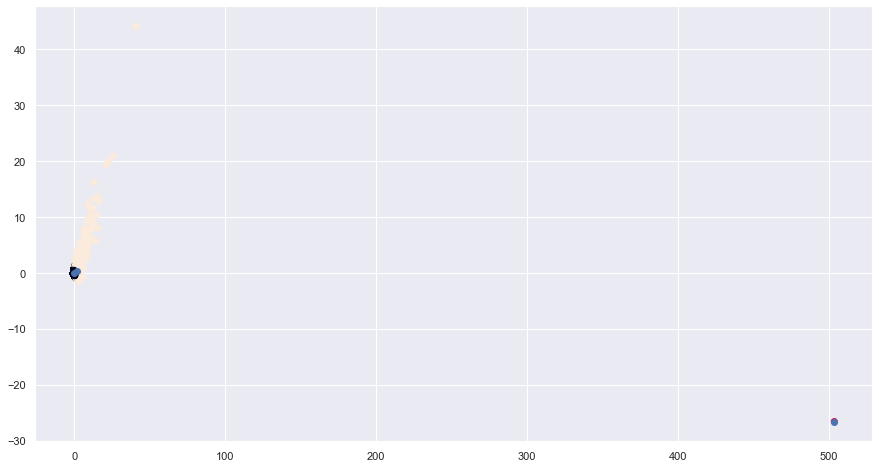

In [33]:
knn=Models(pcaData)
knn.visualizePlot(3,'b',cmap='RdPu')

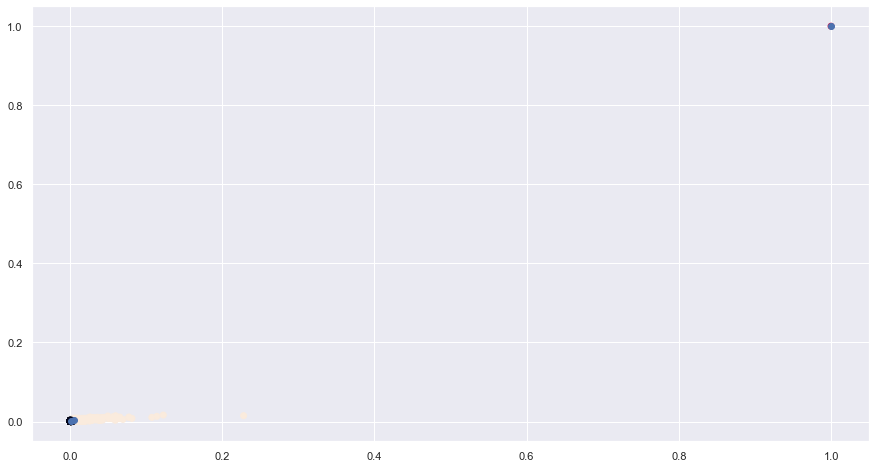

In [30]:
knn=Models(normalizedData)
knn.visualizePlot(3,'b',cmap='RdPu')

In [40]:
data.groupby(['MSISDN/Number']).agg({
    
    'Social Media Total (Bytes)':sum,
    
    'Google Total (Bytes)':sum,
    
    'Email Total (Bytes)':sum,
    
    'Youtube Total (Bytes)':sum,
   
    'Netflix Total (Bytes)':sum,
   
    'Gaming Total (Bytes)':sum,
    
    'Other Total (Bytes)':sum,
    'Total Session (Mbs)':sum
 
    })

,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),Total Session (Mbs)
MSISDN/Number,,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0,1197.612347
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0,416.200012
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0,1040.509209
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0,426.834773
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0,2131.514222
...,...,...,...,...,...,...,...,...
3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0,959.427761
3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,4.370033e+08,211115113.0,653.212936
3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,1.780487e+08,470526473.0,667.383262


In [38]:
data.groupby()

In [39]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Hour,Avg Bearer TP DL (Mbps),Avg Bearer TP UL (Mbps),Activity Duration DL (s),Activity Duration UL (s),Total Session (Mbs),five Class,Decile Class,Decile Class Category,Application Total (Mbs)
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,12,0.022461,0.042969,37.624000,38.787000,493.406131,Low Usage,1,Outlier,5.052479e+05
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,13,0.015625,0.025391,0.168000,3.560000,1176.919550,Outlier,8,Moderately High Usage,1.205166e+06
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,17,0.005859,0.008789,0.000000,0.000000,685.103951,Moderate Usage,2,Extremely Low,7.015464e+05
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,0,0.042969,0.042969,3.330000,37.882000,1562.493020,Outlier,9,Extreme High Usage,1.599993e+06
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,20,0.005859,0.008789,0.000000,0.000000,1104.727653,Extreme Usage,7,High Usage,1.131241e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42.000000000,451.0000,2019-04-30 06:02:33.000000000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,7,0.050781,0.063477,42.376000,41.915000,605.648632,Moderate Usage,2,Extremely Low,6.201842e+05
149997,7349883264234609664,2019-04-29 07:28:42.000000000,483.0000,2019-04-30 10:41:33.000000000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,7,0.022461,0.052734,17.264000,16.759000,1352.276146,Outlier,9,Extreme High Usage,1.384731e+06
149998,13114483573367300096,2019-04-29 07:28:43.000000000,283.0000,2019-04-30 10:46:12.000000000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,7,0.041992,0.045898,25.003000,28.640000,714.110837,Moderate Usage,3,Moderately Low,7.312495e+05
149999,13114483573367300096,2019-04-29 07:28:43.000000000,696.0000,2019-04-30 10:40:34.000000000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,7,0.033203,0.036133,13.405000,34.088000,1159.892205,Extreme Usage,7,High Usage,1.187730e+06


In [41]:
aggFunc.aggregateSumTwo('MSISDN/Number','Social Media Total (Bytes)','Social Media Total (Bytes)',10)

,Social Media Total (Bytes)
MSISDN/Number,
3.362632e+10,2.017192e+09
3.376054e+10,3.978319e+07
3.365973e+10,3.541236e+07
3.361489e+10,2.829454e+07
3.362578e+10,2.713550e+07
3.366716e+10,2.424785e+07
3.378632e+10,2.397492e+07
3.366907e+10,2.380083e+07
3.360313e+10,2.307782e+07


In [43]:
aggFunc.aggregateSumTwo('MSISDN/Number','Google Total (Bytes)','Google Total (Bytes)',10)

,Google Total (Bytes)
MSISDN/Number,
3.362632e+10,8.400769e+09
3.362578e+10,1.423079e+08
3.361489e+10,1.279738e+08
3.376054e+10,1.232231e+08
3.365973e+10,1.165163e+08
3.378632e+10,1.102545e+08
3.367588e+10,1.098605e+08
3.366716e+10,1.050327e+08
3.376127e+10,9.708999e+07


In [44]:
aggFunc.aggregateSumTwo('MSISDN/Number','Email Total (Bytes)','Email Total (Bytes)',10)

,Email Total (Bytes)
MSISDN/Number,
3.362632e+10,2.442299e+09
3.361489e+10,4.078863e+07
3.362578e+10,4.063397e+07
3.378632e+10,3.631012e+07
3.365973e+10,3.599979e+07
3.376054e+10,3.369377e+07
3.367588e+10,3.151442e+07
3.366546e+10,3.041788e+07
3.366716e+10,3.033580e+07


In [45]:
aggFunc.aggregateSumTwo('MSISDN/Number','Youtube Total (Bytes)','Youtube Total (Bytes)',10)

,Youtube Total (Bytes)
MSISDN/Number,
3.362632e+10,2.471521e+10
3.362578e+10,4.529588e+08
3.376054e+10,3.962892e+08
3.361489e+10,3.943702e+08
3.367588e+10,3.174106e+08
3.366716e+10,3.152313e+08
3.362708e+10,3.087908e+08
3.376041e+10,3.031691e+08
3.369879e+10,3.026620e+08


In [46]:
aggFunc.aggregateSumTwo('MSISDN/Number','Netflix Total (Bytes)','Netflix Total (Bytes)',10)

,Netflix Total (Bytes)
MSISDN/Number,
3.362632e+10,2.458230e+10
3.365973e+10,3.995191e+08
3.361489e+10,3.614010e+08
3.362578e+10,3.569806e+08
3.376054e+10,3.346433e+08
3.376041e+10,3.183475e+08
3.366716e+10,3.139395e+08
3.367588e+10,3.090932e+08
3.378632e+10,3.059398e+08


In [47]:
aggFunc.aggregateSumTwo('MSISDN/Number','Gaming Total (Bytes)','Gaming Total (Bytes)',10)

,Gaming Total (Bytes)
MSISDN/Number,
3.362632e+10,4.683656e+11
3.361489e+10,7.749432e+09
3.376054e+10,7.461045e+09
3.362578e+10,7.326673e+09
3.367588e+10,6.970568e+09
3.365973e+10,6.725559e+09
3.366646e+10,6.646303e+09
3.376041e+10,6.268620e+09
3.366471e+10,6.103856e+09


In [48]:
aggFunc.aggregateSumTwo('MSISDN/Number','Other Total (Bytes)','Other Total (Bytes)',10)

,Other Total (Bytes)
MSISDN/Number,
3.362632e+10,4.591463e+11
3.361489e+10,7.639264e+09
3.367588e+10,6.798515e+09
3.362578e+10,6.354583e+09
3.360313e+10,6.326671e+09
3.365973e+10,6.317415e+09
3.362695e+10,5.305448e+09
3.362708e+10,5.117791e+09
3.376127e+10,5.077779e+09


In [50]:
aggFunc.aggregateSumTwo('MSISDN/Number','Total Session (Mbs)','Total Session (Mbs)',10)

,Total Session (Mbs)
MSISDN/Number,
3.362632e+10,943822.516435
3.361489e+10,15584.491763
3.362578e+10,14020.226793
3.367588e+10,13881.859133
3.365973e+10,13245.023117
3.376054e+10,12497.722857
3.366646e+10,11034.684769
3.365836e+10,10832.002024
3.360313e+10,10680.103075


In [51]:

appStats=data[['Social Media Total (Bytes)','Google Total (Bytes)','Email Total (Bytes)','Youtube Total (Bytes)','Netflix Total (Bytes)','Gaming Total (Bytes)','Other Total (Bytes)']]
appTotals=appStats.sum(axis=0)

In [52]:
appTotals

Social Media Total (Bytes)    2.742394e+11
Google Total (Bytes)          1.171102e+12
Email Total (Bytes)           3.388676e+11
Youtube Total (Bytes)         3.396545e+12
Netflix Total (Bytes)         3.394314e+12
Gaming Total (Bytes)          6.455040e+13
Other Total (Bytes)           6.440523e+13
dtype: float64

In [53]:
appDF=pd.DataFrame(appTotals)

In [75]:
top3=appDF.sort_values(by=0,ascending=False).head(3)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

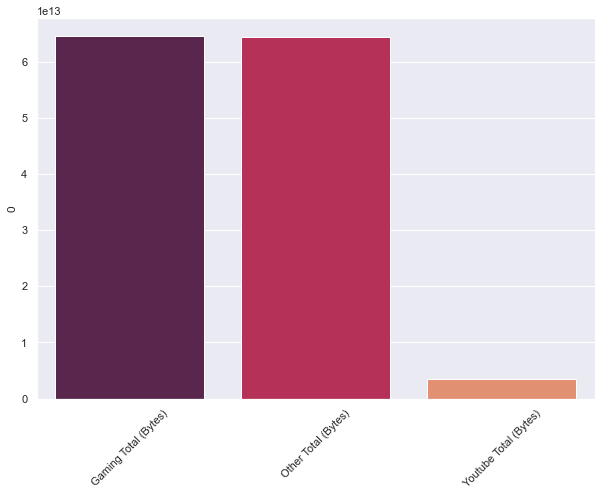

In [76]:
plt.figure(figsize=(10,7))
sns.barplot(x=top3.index,y=top3[0],palette='rocket')
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

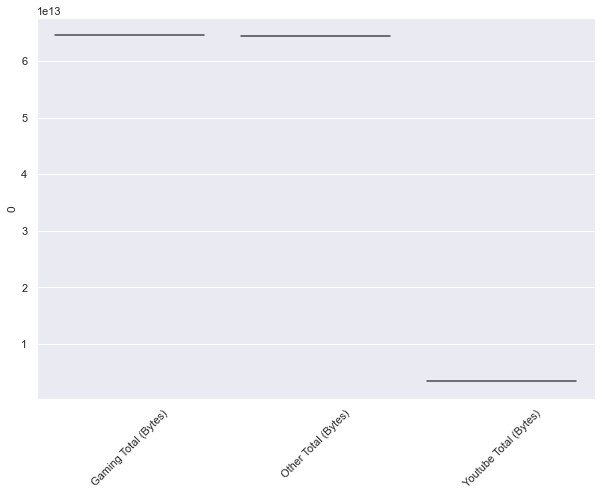

In [77]:
plt.figure(figsize=(10,7))
sns.boxenplot(x=top3.index,y=top3[0], palette='rainbow')
plt.xticks(rotation=45)